In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
data = load_iris() # 加载 IRIS 数据集
print('keys: \n', data.keys()) # ['data', 'target', 'target_names', 'DESCR', 'feature_names']
feature_names = data.get('feature_names')
print('feature names: \n', data.get('feature_names')) # 查看属性名称
print('target names: \n', data.get('target_names')) # 查看 label 名称
x = data.get('data') # 获取样本矩阵
y = data.get('target') # 获取与样本对应的 label 向量
print(x.shape, y.shape) # 查看样本数据


keys: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: 
 ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


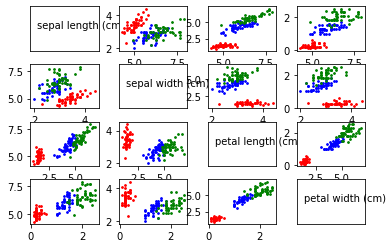

In [4]:
# visualize the data
f = []
f.append(y==0) # 类别为第一类的样本的逻辑索引
f.append(y==1) 
f.append(y==2) 
color = ['red','blue','green']
fig, axes = plt.subplots(4,4) # 绘制四个属性两辆之间的散点图
for i, ax in enumerate(axes.flat):
    row  = i // 4
    col = i % 4
    if row == col:
        ax.text(.1,.5, feature_names[row])
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    for  k in range(3):
        ax.scatter(x[f[k],row], x[f[k],col], c=color[k], s=3)    
fig.subplots_adjust(hspace=0.3, wspace=0.3) # 设置间距

In [34]:
# 随机划分训练集和测试集
num = x.shape[0] # 样本总数
ratio = 8/2 # 划分比例，训练集数目:测试集数目
num_test = int(num/(1+ratio)) # 测试集样本数目
num_train = num -  num_test # 训练集样本数目
index = np.arange(num) # 产生样本标号
np.random.shuffle(index) # 洗牌
x_test = x[index[:num_test],:] # 取出洗牌后前 num_test 作为测试集
y_test = y[index[:num_test]]
x_train = x[index[num_test:],:] # 剩余作为训练集
y_train = y[index[num_test:]]

# 构建决策树
clf = tree.DecisionTreeClassifier() # 建立决策树对象
clf.fit(x_train, y_train) # 决策树拟合

# 预测
y_test_pre = clf.predict(x_test) # 利用拟合的决策树进行预测
print('the predict values are', y_test_pre) # 显示结果

the predict values are [2 2 1 0 0 2 0 1 0 2 0 0 2 1 2 2 2 2 0 2 2 2 0 1 1 0 0 2 1 1]


In [35]:
# 计算分类准确率
acc = sum(y_test_pre==y_test)/num_test
print('the accuracy:', acc) # 显示预测准确率

the accuracy: 0.9666666666666667


In [23]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB

In [24]:
clf = GaussianNB()
clf = clf.fit(iris.data, iris.target)
y_pred=clf.predict(iris.data)
print("高斯朴素贝叶斯，样本总数： %d 错误样本数 : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))
acc = 1 - (iris.target != y_pred).sum()/iris.data.shape[0]
print('the accuracy:', acc) # 显示预测准确率

高斯朴素贝叶斯，样本总数： 150 错误样本数 : 6
the accuracy: 0.96


In [49]:
import pandas as pd
# 1.查看基本信息
df_Iris = pd.read_csv('data/iris.csv')
df_Iris.head() # 前5行
df_Iris.tail() # 后5行
df_Iris.info() # 查看数据整体信息
df_Iris.describe()
# 查看分类的类别数量
df_Iris.describe(include =['O']).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count,unique,top,freq
Species,150,3,Iris-versicolor,50


In [50]:
# 2.特征工程
df_Iris['Species']= df_Iris.Species.str.replace('Iris-','')
df_Iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

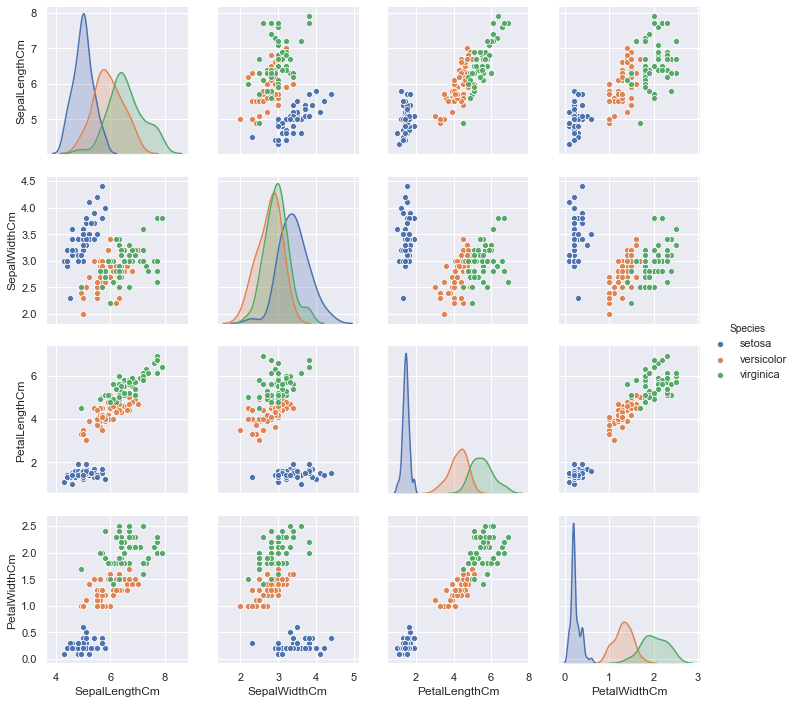

In [54]:
sns.pairplot(data=df_Iris, hue='Species')

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X = df_Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df_Iris['Species']
#将数据按照8:2的比例随机分为训练集, 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#初始化模型
svm = svm.SVC(kernel='linear', probability=True)

#训练模型
svm.fit(X_train, y_train)

#用测试集评估模型的好坏
print('SVM Test score:{:.8f}'.format(svm.score(X_test,y_test)))

SVM Test score:0.96666667


In [69]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

X = df_Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df_Iris['Species']
#将数据按照8:2的比例随机分为训练集, 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#初始化模型
svm = svm.SVC(kernel='linear', probability=True)
mnb = MultinomialNB()
model_tree = tree.DecisionTreeClassifier()
#训练模型
svm.fit(X_train, y_train)
mnb.fit(X_train,y_train)
model_tree.fit(X_train,y_train)
#用测试集评估模型的好坏
print('SVM Test score:{:.8f}'.format(svm.score(X_test,y_test)))
print('Bayes Test score:{:.8f}'.format(mnb.score(X_test,y_test)))
print('Decision Tree Test score:{:.8f}'.format(model_tree.score(X_test,y_test)))

SVM Test score:0.96666667
Bayes Test score:0.93333333
Decision Tree Test score:0.86666667


In [65]:
# 5,检验分类结果，生成混淆矩阵
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

column1 = list(y_test)
column2 = list(svm.predict(X_test))
def confusion(column1, column2):
    TP,FP,FN,TN = 0,0,0,0
    for i in range(0, len(column1)):
        if round(column1[i]) == 1 and round(column2[i]) == 1:
            TP = TP + 1
        if round(column1[i]) == 1 and round(column2[i]) == 0:
            FN = FN + 1
        if round(column1[i]) == 0 and round(column2[i]) == 1:
            FP = FP + 1
        if round(column1[i]) == 0 and round(column2[i]) == 0:
            TN = TN + 1
        column1[i] = round(column1[i])
        column2[i] = round(column2[i])
    return TP, TN, FP, FN
 
def plotCM(classes1,classes2,matrix):
    # Normalize by row
    matrix = matrix.astype(np.float)
    linesum = matrix.sum(1)
    linesum = np.dot(linesum.reshape(-1, 1), np.ones((1, matrix.shape[1])))
    matrix /= linesum
    matrix = np.round(matrix,2)

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, cmap=plt.cm.get_cmap('Blues'))
    fig.colorbar(cax)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(i, j, str(matrix[i][j]), va='center', ha='center')

    ax.set_xticklabels([''] + classes1, rotation=45)
    ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)
    ax.set_yticklabels([''] + classes2)
    
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# 生成二维矩阵
matrix = [[0]*2 for i in range(2)]
matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1] = confusion(column1, column2)
matrix = np.array(matrix)

classes1 = ['P', 'N']
classes2 = ['P', 'N']
plotCM(classes1=classes1, classes2=classes2, matrix=matrix)

TypeError: type str doesn't define __round__ method

In [60]:
# 6.计算评价指标
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

print('准确率Accuracy:', metrics.accuracy_score(y_test, svm.predict(X_test)))
print('精度Precision:', metrics.precision_score(y_test, svm.predict(X_test)))
print('查全率Recall:', metrics.recall_score(y_test, svm.predict(X_test)))
print('调和平均指标F1:', metrics.f1_score(y_test, svm.predict(X_test)))

准确率Accuracy: 1.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].